In [ ]:
"""
I/we certify that the code and data in this assignment were generated independently,
using only the tools and resources defined in the course and that I/we did not receive
any external help, coaching or contributions during the production of this work.
"""

In [4]:
import numpy as np
import torch
from torch import nn
import gym
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import time

In [200]:
env = gym.make("CartPole-v1")

In [7]:
def to_tensor(arr, device):
#     return torch.from_numpy(np.array([1])).float()
    return torch.from_numpy(arr).float().to(device)

In [8]:
class A2C(nn.Module):
#     def __init__(self, name: str ="", state_dim, n_actions: int =1, hidden_activation: str='Tanh'):
    def __init__(self, state_dim, n_actions=1, name='', hidden_activation='Tanh'):
        super(A2C, self).__init__()
        self.name = name
        self.nn_layer = nn.Sequential(
            nn.Linear(state_dim, 64),
            getattr(nn, hidden_activation)(),
            nn.Linear(64, 32),
            getattr(nn, hidden_activation)(),
            nn.Linear(32, n_actions),
#             nn.Softmax()
        )
        self.out_activation = nn.Softmax(dim=-1)
    
    def forward(self, x):
        x = self.nn_layer(x)
        if self.name == 'actor':
            x = self.out_activation(x)
        return x

In [9]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [10]:
torch.from_numpy(np.array([1])).float().to(device)

tensor([1.])

In [11]:
device

'cpu'

In [203]:
state_dim = env.observation_space.shape[0]
n_actions = env.action_space.n
actor = A2C(state_dim=state_dim, n_actions=n_actions, name='actor', hidden_activation='ReLU').to(device)
critic = A2C(state_dim=state_dim, n_actions=1, name='critic', hidden_activation='ReLU').to(device)
# actor = A2C(state_dim=state_dim, n_actions=n_actions, name='actor', hidden_activation='Tanh')
# critic = A2C(state_dim=state_dim, n_actions=1, name='critic', hidden_activation='ReLU')
optim_actor = torch.optim.Adam(actor.parameters(), lr=5e-4)
optim_critic = torch.optim.Adam(critic.parameters(), lr=5e-4)
gama = 0.99

In [204]:
# actor(obs)

In [205]:
episode_rewards = []
num_episodes = 2000
t1 = time.time()
try:
    for i in range(num_episodes):
        total_reward = 0
        obs = env.reset()

        while True:
            probs=actor(to_tensor(obs, device))
            dist = torch.distributions.Categorical(probs=probs)
            action = dist.sample()
#             np_action = action.detach().data.numpy()
#             np_action = action.to(device).detach().data.numpy()
            np_action = action.cpu().detach().data.numpy()

            new_obs, reward, done, _ = env.step(np_action)
            advt = reward + (1-done)*gama*critic(to_tensor(new_obs, device)) - critic(to_tensor(obs, device))
            total_reward += reward
            obs = new_obs

            loss_critic = advt.pow(2).mean()
            optim_critic.zero_grad()
            loss_critic.backward()
            optim_critic.step()

            loss_actor = -dist.log_prob(action)*advt.detach()
            optim_actor.zero_grad()
            loss_actor.backward()
            optim_actor.step()


            if done:
                break

        print(f"Num episodes: {i+1}, Reward: {total_reward}")
        episode_rewards.append(total_reward)
except KeyboardInterrupt:
    #to terminate program when taking too much training time.
    t2 = time.time()
t2 = time.time()
print(f"Total training time: {(t2-t1)/60} minutes")

Num episodes: 1, Reward: 52.0
Num episodes: 2, Reward: 10.0
Num episodes: 3, Reward: 13.0
Num episodes: 4, Reward: 36.0
Num episodes: 5, Reward: 10.0
Num episodes: 6, Reward: 26.0
Num episodes: 7, Reward: 11.0
Num episodes: 8, Reward: 41.0
Num episodes: 9, Reward: 35.0
Num episodes: 10, Reward: 18.0
Num episodes: 11, Reward: 16.0
Num episodes: 12, Reward: 20.0
Num episodes: 13, Reward: 14.0
Num episodes: 14, Reward: 17.0
Num episodes: 15, Reward: 29.0
Num episodes: 16, Reward: 20.0
Num episodes: 17, Reward: 14.0
Num episodes: 18, Reward: 13.0
Num episodes: 19, Reward: 18.0
Num episodes: 20, Reward: 19.0
Num episodes: 21, Reward: 16.0
Num episodes: 22, Reward: 14.0
Num episodes: 23, Reward: 41.0
Num episodes: 24, Reward: 9.0
Num episodes: 25, Reward: 14.0
Num episodes: 26, Reward: 26.0
Num episodes: 27, Reward: 21.0
Num episodes: 28, Reward: 12.0
Num episodes: 29, Reward: 20.0
Num episodes: 30, Reward: 36.0
Num episodes: 31, Reward: 28.0
Num episodes: 32, Reward: 13.0
Num episodes: 33, 

Num episodes: 263, Reward: 75.0
Num episodes: 264, Reward: 54.0
Num episodes: 265, Reward: 41.0
Num episodes: 266, Reward: 44.0
Num episodes: 267, Reward: 50.0
Num episodes: 268, Reward: 30.0
Num episodes: 269, Reward: 44.0
Num episodes: 270, Reward: 38.0
Num episodes: 271, Reward: 52.0
Num episodes: 272, Reward: 190.0
Num episodes: 273, Reward: 56.0
Num episodes: 274, Reward: 264.0
Num episodes: 275, Reward: 103.0
Num episodes: 276, Reward: 60.0
Num episodes: 277, Reward: 32.0
Num episodes: 278, Reward: 35.0
Num episodes: 279, Reward: 59.0
Num episodes: 280, Reward: 56.0
Num episodes: 281, Reward: 46.0
Num episodes: 282, Reward: 82.0
Num episodes: 283, Reward: 80.0
Num episodes: 284, Reward: 102.0
Num episodes: 285, Reward: 115.0
Num episodes: 286, Reward: 167.0
Num episodes: 287, Reward: 69.0
Num episodes: 288, Reward: 100.0
Num episodes: 289, Reward: 148.0
Num episodes: 290, Reward: 86.0
Num episodes: 291, Reward: 137.0
Num episodes: 292, Reward: 76.0
Num episodes: 293, Reward: 135.

Num episodes: 516, Reward: 104.0
Num episodes: 517, Reward: 104.0
Num episodes: 518, Reward: 128.0
Num episodes: 519, Reward: 139.0
Num episodes: 520, Reward: 108.0
Num episodes: 521, Reward: 131.0
Num episodes: 522, Reward: 117.0
Num episodes: 523, Reward: 27.0
Num episodes: 524, Reward: 100.0
Num episodes: 525, Reward: 115.0
Num episodes: 526, Reward: 128.0
Num episodes: 527, Reward: 182.0
Num episodes: 528, Reward: 171.0
Num episodes: 529, Reward: 161.0
Num episodes: 530, Reward: 169.0
Num episodes: 531, Reward: 156.0
Num episodes: 532, Reward: 186.0
Num episodes: 533, Reward: 165.0
Num episodes: 534, Reward: 191.0
Num episodes: 535, Reward: 207.0
Num episodes: 536, Reward: 336.0
Num episodes: 537, Reward: 230.0
Num episodes: 538, Reward: 253.0
Num episodes: 539, Reward: 189.0
Num episodes: 540, Reward: 289.0
Num episodes: 541, Reward: 242.0
Num episodes: 542, Reward: 227.0
Num episodes: 543, Reward: 177.0
Num episodes: 544, Reward: 177.0
Num episodes: 545, Reward: 167.0
Num episode

Num episodes: 765, Reward: 227.0
Num episodes: 766, Reward: 292.0
Num episodes: 767, Reward: 336.0
Num episodes: 768, Reward: 342.0
Num episodes: 769, Reward: 500.0
Num episodes: 770, Reward: 500.0
Num episodes: 771, Reward: 241.0
Num episodes: 772, Reward: 256.0
Num episodes: 773, Reward: 196.0
Num episodes: 774, Reward: 138.0
Num episodes: 775, Reward: 114.0
Num episodes: 776, Reward: 21.0
Num episodes: 777, Reward: 25.0
Num episodes: 778, Reward: 96.0
Num episodes: 779, Reward: 132.0
Num episodes: 780, Reward: 148.0
Num episodes: 781, Reward: 148.0
Num episodes: 782, Reward: 175.0
Num episodes: 783, Reward: 160.0
Num episodes: 784, Reward: 165.0
Num episodes: 785, Reward: 158.0
Num episodes: 786, Reward: 159.0
Num episodes: 787, Reward: 147.0
Num episodes: 788, Reward: 204.0
Num episodes: 789, Reward: 261.0
Num episodes: 790, Reward: 342.0
Num episodes: 791, Reward: 461.0
Num episodes: 792, Reward: 500.0
Num episodes: 793, Reward: 396.0
Num episodes: 794, Reward: 143.0
Num episodes:

Num episodes: 1013, Reward: 255.0
Num episodes: 1014, Reward: 245.0
Num episodes: 1015, Reward: 296.0
Num episodes: 1016, Reward: 355.0
Num episodes: 1017, Reward: 320.0
Num episodes: 1018, Reward: 269.0
Num episodes: 1019, Reward: 258.0
Num episodes: 1020, Reward: 254.0
Num episodes: 1021, Reward: 320.0
Num episodes: 1022, Reward: 319.0
Num episodes: 1023, Reward: 411.0
Num episodes: 1024, Reward: 414.0
Num episodes: 1025, Reward: 274.0
Num episodes: 1026, Reward: 226.0
Num episodes: 1027, Reward: 296.0
Num episodes: 1028, Reward: 195.0
Num episodes: 1029, Reward: 175.0
Num episodes: 1030, Reward: 116.0
Num episodes: 1031, Reward: 107.0
Num episodes: 1032, Reward: 125.0
Num episodes: 1033, Reward: 117.0
Num episodes: 1034, Reward: 111.0
Num episodes: 1035, Reward: 109.0
Num episodes: 1036, Reward: 100.0
Num episodes: 1037, Reward: 116.0
Num episodes: 1038, Reward: 102.0
Num episodes: 1039, Reward: 101.0
Num episodes: 1040, Reward: 105.0
Num episodes: 1041, Reward: 124.0
Num episodes: 

Num episodes: 1256, Reward: 167.0
Num episodes: 1257, Reward: 121.0
Num episodes: 1258, Reward: 275.0
Num episodes: 1259, Reward: 173.0
Num episodes: 1260, Reward: 145.0
Num episodes: 1261, Reward: 117.0
Num episodes: 1262, Reward: 249.0
Num episodes: 1263, Reward: 264.0
Num episodes: 1264, Reward: 147.0
Num episodes: 1265, Reward: 163.0
Num episodes: 1266, Reward: 122.0
Num episodes: 1267, Reward: 100.0
Num episodes: 1268, Reward: 102.0
Num episodes: 1269, Reward: 105.0
Num episodes: 1270, Reward: 144.0
Num episodes: 1271, Reward: 142.0
Num episodes: 1272, Reward: 191.0
Num episodes: 1273, Reward: 140.0
Num episodes: 1274, Reward: 193.0
Num episodes: 1275, Reward: 271.0
Num episodes: 1276, Reward: 211.0
Num episodes: 1277, Reward: 168.0
Num episodes: 1278, Reward: 244.0
Num episodes: 1279, Reward: 220.0
Num episodes: 1280, Reward: 314.0
Num episodes: 1281, Reward: 298.0
Num episodes: 1282, Reward: 381.0
Num episodes: 1283, Reward: 289.0
Num episodes: 1284, Reward: 239.0
Num episodes: 

Num episodes: 1498, Reward: 236.0
Num episodes: 1499, Reward: 191.0
Num episodes: 1500, Reward: 175.0
Num episodes: 1501, Reward: 291.0
Num episodes: 1502, Reward: 500.0
Num episodes: 1503, Reward: 317.0
Num episodes: 1504, Reward: 335.0
Num episodes: 1505, Reward: 473.0
Num episodes: 1506, Reward: 500.0
Num episodes: 1507, Reward: 384.0
Num episodes: 1508, Reward: 175.0
Num episodes: 1509, Reward: 168.0
Num episodes: 1510, Reward: 210.0
Num episodes: 1511, Reward: 247.0
Num episodes: 1512, Reward: 357.0
Num episodes: 1513, Reward: 375.0
Num episodes: 1514, Reward: 282.0
Num episodes: 1515, Reward: 497.0
Num episodes: 1516, Reward: 414.0
Num episodes: 1517, Reward: 454.0
Num episodes: 1518, Reward: 326.0
Num episodes: 1519, Reward: 325.0
Num episodes: 1520, Reward: 500.0
Num episodes: 1521, Reward: 424.0
Num episodes: 1522, Reward: 378.0
Num episodes: 1523, Reward: 500.0
Num episodes: 1524, Reward: 500.0
Num episodes: 1525, Reward: 465.0
Num episodes: 1526, Reward: 430.0
Num episodes: 

Num episodes: 1740, Reward: 490.0
Num episodes: 1741, Reward: 341.0
Num episodes: 1742, Reward: 163.0
Num episodes: 1743, Reward: 117.0
Num episodes: 1744, Reward: 121.0
Num episodes: 1745, Reward: 104.0
Num episodes: 1746, Reward: 67.0
Num episodes: 1747, Reward: 121.0
Num episodes: 1748, Reward: 151.0
Num episodes: 1749, Reward: 122.0
Num episodes: 1750, Reward: 104.0
Num episodes: 1751, Reward: 127.0
Num episodes: 1752, Reward: 500.0
Num episodes: 1753, Reward: 99.0
Num episodes: 1754, Reward: 193.0
Num episodes: 1755, Reward: 77.0
Num episodes: 1756, Reward: 81.0
Num episodes: 1757, Reward: 89.0
Num episodes: 1758, Reward: 71.0
Num episodes: 1759, Reward: 55.0
Num episodes: 1760, Reward: 74.0
Num episodes: 1761, Reward: 50.0
Num episodes: 1762, Reward: 58.0
Num episodes: 1763, Reward: 49.0
Num episodes: 1764, Reward: 72.0
Num episodes: 1765, Reward: 62.0
Num episodes: 1766, Reward: 77.0
Num episodes: 1767, Reward: 73.0
Num episodes: 1768, Reward: 116.0
Num episodes: 1769, Reward: 6

Num episodes: 1984, Reward: 184.0
Num episodes: 1985, Reward: 107.0
Num episodes: 1986, Reward: 237.0
Num episodes: 1987, Reward: 153.0
Num episodes: 1988, Reward: 105.0
Num episodes: 1989, Reward: 101.0
Num episodes: 1990, Reward: 396.0
Num episodes: 1991, Reward: 185.0
Num episodes: 1992, Reward: 128.0
Num episodes: 1993, Reward: 116.0
Num episodes: 1994, Reward: 210.0
Num episodes: 1995, Reward: 194.0
Num episodes: 1996, Reward: 149.0
Num episodes: 1997, Reward: 132.0
Num episodes: 1998, Reward: 139.0
Num episodes: 1999, Reward: 134.0
Num episodes: 2000, Reward: 500.0
Total training time: 10.84871920744578 minutes


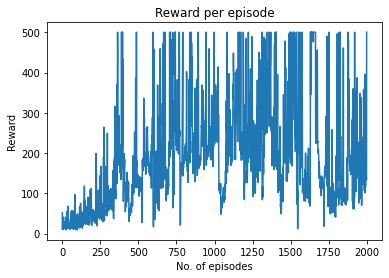

In [206]:
plt.plot(np.arange(len(episode_rewards)), episode_rewards)
plt.title("Reward per episode")
plt.xlabel("No. of episodes")
plt.ylabel("Reward")
plt.show()

In [207]:
eval_episode_rewards = []
num_episodes = 10
t1 = time.time()
try:
    for i in range(num_episodes):
        total_reward = 0
        obs = env.reset()

        while True:
            probs=actor(to_tensor(obs, device))
            dist = torch.distributions.Categorical(probs=probs)
            action = dist.sample()
#             np_action = action.detach().data.numpy()
#             np_action = action.to(device).detach().data.numpy()
            np_action = action.cpu().detach().data.numpy()

            new_obs, reward, done, _ = env.step(np_action)
#             advt = reward + (1-done)*gama*critic(to_tensor(new_obs, device)) - critic(to_tensor(obs, device))
            total_reward += reward
            obs = new_obs

            if done:
                break

        print(f"Num episodes: {i+1}, Reward: {total_reward}")
        eval_episode_rewards.append(total_reward)
except KeyboardInterrupt:
    #to terminate program when taking too much training time.
    t2 = time.time()
t2 = time.time()
print(f"Total training time: {(t2-t1)/60} minutes")

Num episodes: 1, Reward: 500.0
Num episodes: 2, Reward: 199.0
Num episodes: 3, Reward: 363.0
Num episodes: 4, Reward: 351.0
Num episodes: 5, Reward: 325.0
Num episodes: 6, Reward: 420.0
Num episodes: 7, Reward: 379.0
Num episodes: 8, Reward: 500.0
Num episodes: 9, Reward: 500.0
Num episodes: 10, Reward: 372.0
Total training time: 0.01625662644704183 minutes


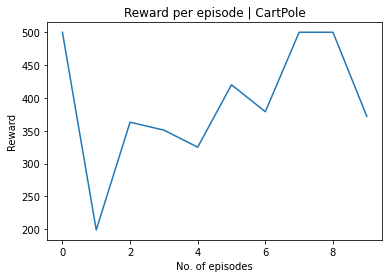

In [208]:
plt.plot(np.arange(len(eval_episode_rewards)), eval_episode_rewards)
plt.title("Reward per episode | CartPole")
plt.xlabel("No. of episodes")
plt.ylabel("Reward")
plt.show()

# Part 2

# LunarLander

In [211]:
env2 = gym.make("LunarLander-v2")

In [264]:
help(env2.unwrapped)
# env2.action_space.

Help on LunarLander in module gym.envs.box2d.lunar_lander object:

class LunarLander(gym.core.Env, gym.utils.ezpickle.EzPickle)
 |  The main OpenAI Gym class. It encapsulates an environment with
 |  arbitrary behind-the-scenes dynamics. An environment can be
 |  partially or fully observed.
 |  
 |  The main API methods that users of this class need to know are:
 |  
 |      step
 |      reset
 |      render
 |      close
 |      seed
 |  
 |  And set the following attributes:
 |  
 |      action_space: The Space object corresponding to valid actions
 |      observation_space: The Space object corresponding to valid observations
 |      reward_range: A tuple corresponding to the min and max possible rewards
 |  
 |  Note: a default reward range set to [-inf,+inf] already exists. Set it if you want a narrower range.
 |  
 |  The methods are accessed publicly as "step", "reset", etc...
 |  
 |  Method resolution order:
 |      LunarLander
 |      gym.core.Env
 |      gym.utils.ezpickle.E

In [214]:
state_dim = env2.observation_space.shape[0]
n_actions = env2.action_space.n
actor = A2C(state_dim=state_dim, n_actions=n_actions, name='actor', hidden_activation='Tanh').to(device)
critic = A2C(state_dim=state_dim, n_actions=1, name='critic', hidden_activation='ReLU').to(device)
# actor = A2C(state_dim=state_dim, n_actions=n_actions, name='actor', hidden_activation='Tanh')
# critic = A2C(state_dim=state_dim, n_actions=1, name='critic', hidden_activation='ReLU')
optim_actor = torch.optim.Adam(actor.parameters(), lr=5e-4)
optim_critic = torch.optim.Adam(critic.parameters(), lr=5e-4)
gama = 0.99

In [215]:
episode_rewards = []
num_episodes = 1500
t1 = time.time()
try:
    for i in range(num_episodes):
        total_reward = 0
        obs = env2.reset()

        while True:
            probs=actor(to_tensor(obs, device))
            dist = torch.distributions.Categorical(probs=probs)
            action = dist.sample()
#             np_action = action.detach().data.numpy()
#             np_action = action.to(device).detach().data.numpy()
            np_action = action.cpu().detach().data.numpy()

            new_obs, reward, done, _ = env2.step(np_action)
            advt = reward + (1-done)*gama*critic(to_tensor(new_obs, device)) - critic(to_tensor(obs, device))
            total_reward += reward
            obs = new_obs

            loss_critic = advt.pow(2).mean()
            optim_critic.zero_grad()
            loss_critic.backward()
            optim_critic.step()

            loss_actor = -dist.log_prob(action)*advt.detach()
            optim_actor.zero_grad()
            loss_actor.backward()
            optim_actor.step()


            if done:
                break

        print(f"Num episodes: {i+1}, Reward: {total_reward}")
        episode_rewards.append(total_reward)
except KeyboardInterrupt:
    #to terminate program when taking too much training time.
    t2 = time.time()
t2 = time.time()
print(f"Total training time: {(t2-t1)/60} minutes")

Num episodes: 1, Reward: -465.85794512598454
Num episodes: 2, Reward: -125.76811812251061
Num episodes: 3, Reward: -773.8814131708526
Num episodes: 4, Reward: -442.12246101725725
Num episodes: 5, Reward: -217.28328285801672
Num episodes: 6, Reward: -255.7470801639449
Num episodes: 7, Reward: -502.288766998654
Num episodes: 8, Reward: -151.8738458690888
Num episodes: 9, Reward: -427.572540127091
Num episodes: 10, Reward: -582.1461815978246
Num episodes: 11, Reward: -535.0261514448868
Num episodes: 12, Reward: -283.1809962343078
Num episodes: 13, Reward: -454.5004857347689
Num episodes: 14, Reward: -382.6172847421498
Num episodes: 15, Reward: -195.41268998626663
Num episodes: 16, Reward: -78.30490761085707
Num episodes: 17, Reward: -398.3636592926698
Num episodes: 18, Reward: -52.12313689963157
Num episodes: 19, Reward: -93.94759486485277
Num episodes: 20, Reward: -212.05664684278656
Num episodes: 21, Reward: -222.0722719503106
Num episodes: 22, Reward: -324.1503922500141
Num episodes: 2

Num episodes: 181, Reward: -60.18957833809267
Num episodes: 182, Reward: -17.50281380150963
Num episodes: 183, Reward: -258.0481850139095
Num episodes: 184, Reward: -207.22865778434027
Num episodes: 185, Reward: -29.811909621125878
Num episodes: 186, Reward: -155.45238363334192
Num episodes: 187, Reward: -217.91057235607354
Num episodes: 188, Reward: 28.361614986570316
Num episodes: 189, Reward: -211.0401099658171
Num episodes: 190, Reward: -140.08578578279418
Num episodes: 191, Reward: -232.2340777061039
Num episodes: 192, Reward: -30.55730063720121
Num episodes: 193, Reward: 58.55835702581615
Num episodes: 194, Reward: -228.29108604505177
Num episodes: 195, Reward: 236.934322206209
Num episodes: 196, Reward: 205.2387804231437
Num episodes: 197, Reward: -232.3455992205672
Num episodes: 198, Reward: -190.77227562239685
Num episodes: 199, Reward: -156.1313420233988
Num episodes: 200, Reward: -197.62182293735214
Num episodes: 201, Reward: -171.58029557451857
Num episodes: 202, Reward: -7

Num episodes: 359, Reward: -63.75438102785519
Num episodes: 360, Reward: -168.27595158356092
Num episodes: 361, Reward: 214.98588109710516
Num episodes: 362, Reward: 158.19867013637668
Num episodes: 363, Reward: -239.59207238853418
Num episodes: 364, Reward: -155.1012756125613
Num episodes: 365, Reward: 224.42464765362197
Num episodes: 366, Reward: 159.44832086014824
Num episodes: 367, Reward: -220.68157702356442
Num episodes: 368, Reward: -51.67140349744219
Num episodes: 369, Reward: -220.34310010563777
Num episodes: 370, Reward: 83.20325449214927
Num episodes: 371, Reward: -53.83939746464324
Num episodes: 372, Reward: 143.02010257468507
Num episodes: 373, Reward: 204.68777194624147
Num episodes: 374, Reward: 155.01235615380511
Num episodes: 375, Reward: 13.406684154900258
Num episodes: 376, Reward: -36.63697276010329
Num episodes: 377, Reward: 246.6185864768526
Num episodes: 378, Reward: 194.7831084199189
Num episodes: 379, Reward: 224.6015790866678
Num episodes: 380, Reward: 169.362

Num episodes: 538, Reward: 205.7971136538464
Num episodes: 539, Reward: 234.4718783080113
Num episodes: 540, Reward: 203.22848482405118
Num episodes: 541, Reward: 10.130290485205848
Num episodes: 542, Reward: 236.34706671442513
Num episodes: 543, Reward: -21.005262077076367
Num episodes: 544, Reward: 7.233736065727285
Num episodes: 545, Reward: -104.81332906637925
Num episodes: 546, Reward: 229.68322322628205
Num episodes: 547, Reward: -155.87399083679327
Num episodes: 548, Reward: -20.453203607365367
Num episodes: 549, Reward: 295.58075928692705
Num episodes: 550, Reward: -118.55644321221082
Num episodes: 551, Reward: -159.13858285640396
Num episodes: 552, Reward: -134.8539932840291
Num episodes: 553, Reward: -10.13113608029711
Num episodes: 554, Reward: 208.22677940931507
Num episodes: 555, Reward: -135.5324157523551
Num episodes: 556, Reward: 227.92055132408524
Num episodes: 557, Reward: 187.18005325854506
Num episodes: 558, Reward: 282.4502346148185
Num episodes: 559, Reward: -100.

Num episodes: 717, Reward: 268.52028202842973
Num episodes: 718, Reward: 255.15272409186267
Num episodes: 719, Reward: -167.44003914997296
Num episodes: 720, Reward: 221.0175217301825
Num episodes: 721, Reward: 250.09981243942997
Num episodes: 722, Reward: 36.225504084749986
Num episodes: 723, Reward: 180.6325624307716
Num episodes: 724, Reward: 213.46047640929092
Num episodes: 725, Reward: -29.375492042555052
Num episodes: 726, Reward: 284.21231337521425
Num episodes: 727, Reward: 11.222989334180866
Num episodes: 728, Reward: 85.77133491591152
Num episodes: 729, Reward: 176.96144846662264
Num episodes: 730, Reward: 228.35675967874243
Num episodes: 731, Reward: 9.839408175891506
Num episodes: 732, Reward: -172.78716567120063
Num episodes: 733, Reward: 300.6816622898141
Num episodes: 734, Reward: 251.54937654641333
Num episodes: 735, Reward: 2.0426729938494645
Num episodes: 736, Reward: -8.722854330998643
Num episodes: 737, Reward: 230.1452515010935
Num episodes: 738, Reward: 48.9307448

Num episodes: 896, Reward: 6.81377393031066
Num episodes: 897, Reward: 205.4101200561458
Num episodes: 898, Reward: 283.41006239019157
Num episodes: 899, Reward: 253.60314162829616
Num episodes: 900, Reward: -154.04444721648133
Num episodes: 901, Reward: 22.62740849520658
Num episodes: 902, Reward: -17.224855494768377
Num episodes: 903, Reward: 244.2726173901272
Num episodes: 904, Reward: 278.47723280243207
Num episodes: 905, Reward: 216.78258827590892
Num episodes: 906, Reward: 299.5942824182248
Num episodes: 907, Reward: 52.846037802062085
Num episodes: 908, Reward: -62.55361818283035
Num episodes: 909, Reward: 9.295522683661417
Num episodes: 910, Reward: 273.319981594867
Num episodes: 911, Reward: 104.12320657307095
Num episodes: 912, Reward: -158.86277991519103
Num episodes: 913, Reward: 173.76497519672841
Num episodes: 914, Reward: 214.90023571380928
Num episodes: 915, Reward: 21.812420565279822
Num episodes: 916, Reward: 176.40039230756798
Num episodes: 917, Reward: 226.340987467

Num episodes: 1075, Reward: -42.10041155740106
Num episodes: 1076, Reward: -3.3251782507329586
Num episodes: 1077, Reward: -18.046146040986667
Num episodes: 1078, Reward: 142.8539612291002
Num episodes: 1079, Reward: -37.61241425383287
Num episodes: 1080, Reward: -224.0109891700783
Num episodes: 1081, Reward: -32.94034831518047
Num episodes: 1082, Reward: 28.600416057851014
Num episodes: 1083, Reward: 8.581242460721977
Num episodes: 1084, Reward: -10.935353988844795
Num episodes: 1085, Reward: 7.212896409124639
Num episodes: 1086, Reward: -151.50380288014279
Num episodes: 1087, Reward: 258.37033441205665
Num episodes: 1088, Reward: -48.05853576327846
Num episodes: 1089, Reward: 233.01304375401224
Num episodes: 1090, Reward: 4.00248320031376
Num episodes: 1091, Reward: 231.3139456034161
Num episodes: 1092, Reward: 176.97580187269986
Num episodes: 1093, Reward: 244.58666122867112
Num episodes: 1094, Reward: 132.9924025228771
Num episodes: 1095, Reward: 136.07838363380773
Num episodes: 10

Num episodes: 1250, Reward: 180.44767305168273
Num episodes: 1251, Reward: 15.795096495794414
Num episodes: 1252, Reward: -6.728720245211491
Num episodes: 1253, Reward: -25.437924192274224
Num episodes: 1254, Reward: 13.656058822493733
Num episodes: 1255, Reward: 9.030112426604731
Num episodes: 1256, Reward: -28.225441537024196
Num episodes: 1257, Reward: -11.632736126550224
Num episodes: 1258, Reward: -243.7517521582216
Num episodes: 1259, Reward: 1.2773832659430648
Num episodes: 1260, Reward: -157.82406507276227
Num episodes: 1261, Reward: -2.246437535123988
Num episodes: 1262, Reward: -145.75443823267187
Num episodes: 1263, Reward: -7.673761354180613
Num episodes: 1264, Reward: 260.52674439394406
Num episodes: 1265, Reward: -154.12585718901963
Num episodes: 1266, Reward: 171.70122717906986
Num episodes: 1267, Reward: -136.8803130761164
Num episodes: 1268, Reward: 12.240159861787632
Num episodes: 1269, Reward: 194.44338799649205
Num episodes: 1270, Reward: 221.75352589371343
Num epis

Num episodes: 1425, Reward: 282.7538075005358
Num episodes: 1426, Reward: 25.149716496437506
Num episodes: 1427, Reward: 18.531857920613007
Num episodes: 1428, Reward: -23.53867406094681
Num episodes: 1429, Reward: 261.8023280756753
Num episodes: 1430, Reward: -48.05826200388368
Num episodes: 1431, Reward: 166.25309072800349
Num episodes: 1432, Reward: 29.06580114646397
Num episodes: 1433, Reward: 270.3086581192588
Num episodes: 1434, Reward: -89.76082698028242
Num episodes: 1435, Reward: -6.657457201769404
Num episodes: 1436, Reward: -122.16223623730008
Num episodes: 1437, Reward: 220.13809528474775
Num episodes: 1438, Reward: 180.88950888599115
Num episodes: 1439, Reward: 229.6823299627573
Num episodes: 1440, Reward: -26.588645557430254
Num episodes: 1441, Reward: 194.93643775382444
Num episodes: 1442, Reward: 279.37122202490013
Num episodes: 1443, Reward: 252.03419607070575
Num episodes: 1444, Reward: 63.4256048531978
Num episodes: 1445, Reward: -63.72038382832789
Num episodes: 1446

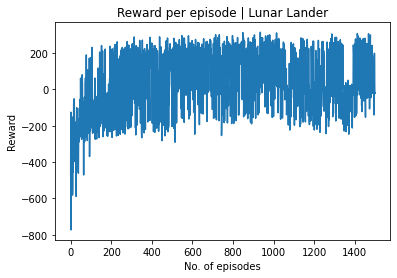

In [216]:
plt.plot(np.arange(len(episode_rewards)), episode_rewards)
plt.title("Reward per episode | Lunar Lander")
plt.xlabel("No. of episodes")
plt.ylabel("Reward")
plt.show()

In [217]:
eval_episode_rewards = []
num_episodes = 10
t1 = time.time()
try:
    for i in range(num_episodes):
        total_reward = 0
        obs = env2.reset()

        while True:
            probs=actor(to_tensor(obs, device))
            dist = torch.distributions.Categorical(probs=probs)
            action = dist.sample()
#             np_action = action.detach().data.numpy()
#             np_action = action.to(device).detach().data.numpy()
            np_action = action.cpu().detach().data.numpy()

            new_obs, reward, done, _ = env2.step(np_action)
            advt = reward + (1-done)*gama*critic(to_tensor(new_obs, device)) - critic(to_tensor(obs, device))
            total_reward += reward
            obs = new_obs

            if done:
                break

        print(f"Num episodes: {i+1}, Reward: {total_reward}")
        eval_episode_rewards.append(total_reward)
except KeyboardInterrupt:
    #to terminate program when taking too much training time.
    t2 = time.time()
t2 = time.time()
print(f"Total training time: {(t2-t1)/60} minutes")

Num episodes: 1, Reward: 28.71254821944052
Num episodes: 2, Reward: -8.32713469973207
Num episodes: 3, Reward: -114.05912179550616
Num episodes: 4, Reward: 48.19817163030141
Num episodes: 5, Reward: -37.28688138593283
Num episodes: 6, Reward: 116.88844142400772
Num episodes: 7, Reward: -19.969765937157717
Num episodes: 8, Reward: -14.710275142846442
Num episodes: 9, Reward: 100.77257044317791
Num episodes: 10, Reward: -37.26744971625175
Total training time: 0.1738386034965515 minutes


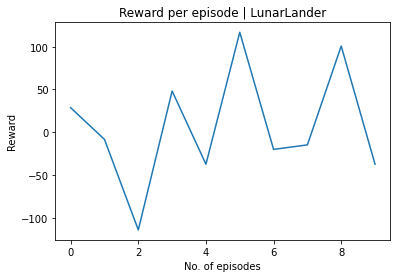

In [266]:
plt.plot(np.arange(len(eval_episode_rewards)), eval_episode_rewards)
plt.title("Reward per episode | LunarLander")
plt.xlabel("No. of episodes")
plt.ylabel("Reward")
plt.show()

# Acrobot env

In [31]:
import random

In [29]:
all_env = gym.envs.registry.all()
all_env

dict_values([EnvSpec(Copy-v0), EnvSpec(RepeatCopy-v0), EnvSpec(ReversedAddition-v0), EnvSpec(ReversedAddition3-v0), EnvSpec(DuplicatedInput-v0), EnvSpec(Reverse-v0), EnvSpec(CartPole-v0), EnvSpec(CartPole-v1), EnvSpec(MountainCar-v0), EnvSpec(MountainCarContinuous-v0), EnvSpec(Pendulum-v0), EnvSpec(Acrobot-v1), EnvSpec(LunarLander-v2), EnvSpec(LunarLanderContinuous-v2), EnvSpec(BipedalWalker-v3), EnvSpec(BipedalWalkerHardcore-v3), EnvSpec(CarRacing-v0), EnvSpec(Blackjack-v0), EnvSpec(KellyCoinflip-v0), EnvSpec(KellyCoinflipGeneralized-v0), EnvSpec(FrozenLake-v0), EnvSpec(FrozenLake8x8-v0), EnvSpec(CliffWalking-v0), EnvSpec(NChain-v0), EnvSpec(Roulette-v0), EnvSpec(Taxi-v3), EnvSpec(GuessingGame-v0), EnvSpec(HotterColder-v0), EnvSpec(Reacher-v2), EnvSpec(Pusher-v2), EnvSpec(Thrower-v2), EnvSpec(Striker-v2), EnvSpec(InvertedPendulum-v2), EnvSpec(InvertedDoublePendulum-v2), EnvSpec(HalfCheetah-v2), EnvSpec(HalfCheetah-v3), EnvSpec(Hopper-v2), EnvSpec(Hopper-v3), EnvSpec(Swimmer-v2), EnvSp

In [274]:
env3 = gym.make("Acrobot-v1")
# env3.seed(0)

In [27]:
class A2C_3(nn.Module):
#     def __init__(self, name: str ="", state_dim, n_actions: int =1, hidden_activation: str='Tanh'):
    def __init__(self, state_dim, n_actions=1, name='', hidden_activation='Tanh', env = gym.make("CartPole-v1")):
        super(A2C_3, self).__init__()
        self.name = name
        self.state_dim = state_dim
        self.nn_layer = nn.Sequential(
            nn.Linear(state_dim, 64),
            getattr(nn, hidden_activation)(),
            nn.Linear(64, 32),
            getattr(nn, hidden_activation)(),
            nn.Linear(32, n_actions),
#             nn.Softmax()
        )
        self.out_activation = nn.Softmax(dim=-1)
        self.env = env
    
    def forward(self, x):
        x = self.nn_layer(x)
        if self.name == 'actor':
            x = self.out_activation(x)
        return x
    
#     def get_action(self, eps):

In [28]:
state_dim = env3.observation_space.shape[0]
n_actions = env3.action_space.n
actor = A2C_3(state_dim=state_dim, n_actions=n_actions, name='actor', hidden_activation='Tanh',env=env3).to(device)

In [98]:
env3.step(0)

(array([-0.47483642, -0.00137461]), -1.0, False, {})

In [192]:
n_actions = env3.action_space.shape
n_actions
# np.random.randint
print(env3.action_space)
print(env.action_space)
env3.action_space.n

Discrete(3)
Discrete(2)


3

In [280]:
state_dim = env3.observation_space.shape[0]
n_actions = env3.action_space.n
actor = A2C(state_dim=state_dim, n_actions=n_actions, name='actor', hidden_activation='Tanh').to(device)
critic = A2C(state_dim=state_dim, n_actions=1, name='critic', hidden_activation='ReLU').to(device)
# actor = A2C(state_dim=state_dim, n_actions=n_actions, name='actor', hidden_activation='Tanh')
# critic = A2C(state_dim=state_dim, n_actions=1, name='critic', hidden_activation='ReLU')
optim_actor = torch.optim.Adam(actor.parameters(), lr=8e-4)
optim_critic = torch.optim.Adam(critic.parameters(), lr=8e-4)
gama = 0.99
eps = 1

In [281]:
episode_rewards = []
num_episodes = 1000
eps_decay = (0.01) ** (1/num_episodes)
t1 = time.time()
try:
    for i in range(num_episodes):
        total_reward = 0
        obs = env3.reset()
        counter = 0
        while True:
            counter +=1
            probs=actor(to_tensor(obs, device))
            dist = torch.distributions.Categorical(probs=probs)
            temp = random.random()
            action = dist.sample()
#             if temp > eps:
#                 action = dist.sample()
#             else:
#                 action = dist.sample_n(n_actions)
#                 action = action[random.randint(-1,2)]
#             np_action = action.detach().data.numpy()
#             np_action = action.to(device).detach().data.numpy()
            np_action = action.cpu().detach().data.numpy()

            new_obs, reward, done, _ = env3.step(np_action)
            advt = reward + (1-done)*gama*critic(to_tensor(new_obs, device)) - critic(to_tensor(obs, device))
            total_reward += reward
            obs = new_obs
            
#             if counter %5==0:
            loss_critic = advt.pow(2).mean()
            optim_critic.zero_grad()
            loss_critic.backward()
            optim_critic.step()

            loss_actor = -dist.log_prob(action)*advt.detach()
            optim_actor.zero_grad()
            loss_actor.backward()
            optim_actor.step()


            if done:
                break
        print(f"Num episodes: {i+1}, Reward: {total_reward}, Epsilon value: {eps}")
        episode_rewards.append(total_reward)
#         eps *= eps_decay
except KeyboardInterrupt:
    #to terminate program when taking too much training time.
    t2 = time.time()
t2 = time.time()
print(f"Total training time: {(t2-t1)/60} minutes")

Num episodes: 1, Reward: -500.0, Epsilon value: 1
Num episodes: 2, Reward: -500.0, Epsilon value: 1
Num episodes: 3, Reward: -500.0, Epsilon value: 1
Num episodes: 4, Reward: -500.0, Epsilon value: 1
Num episodes: 5, Reward: -500.0, Epsilon value: 1
Num episodes: 6, Reward: -467.0, Epsilon value: 1
Num episodes: 7, Reward: -178.0, Epsilon value: 1
Num episodes: 8, Reward: -127.0, Epsilon value: 1
Num episodes: 9, Reward: -294.0, Epsilon value: 1
Num episodes: 10, Reward: -98.0, Epsilon value: 1
Num episodes: 11, Reward: -185.0, Epsilon value: 1
Num episodes: 12, Reward: -119.0, Epsilon value: 1
Num episodes: 13, Reward: -101.0, Epsilon value: 1
Num episodes: 14, Reward: -108.0, Epsilon value: 1
Num episodes: 15, Reward: -174.0, Epsilon value: 1
Num episodes: 16, Reward: -174.0, Epsilon value: 1
Num episodes: 17, Reward: -158.0, Epsilon value: 1
Num episodes: 18, Reward: -117.0, Epsilon value: 1
Num episodes: 19, Reward: -95.0, Epsilon value: 1
Num episodes: 20, Reward: -100.0, Epsilon 

Num episodes: 164, Reward: -73.0, Epsilon value: 1
Num episodes: 165, Reward: -81.0, Epsilon value: 1
Num episodes: 166, Reward: -77.0, Epsilon value: 1
Num episodes: 167, Reward: -78.0, Epsilon value: 1
Num episodes: 168, Reward: -72.0, Epsilon value: 1
Num episodes: 169, Reward: -78.0, Epsilon value: 1
Num episodes: 170, Reward: -80.0, Epsilon value: 1
Num episodes: 171, Reward: -82.0, Epsilon value: 1
Num episodes: 172, Reward: -81.0, Epsilon value: 1
Num episodes: 173, Reward: -86.0, Epsilon value: 1
Num episodes: 174, Reward: -92.0, Epsilon value: 1
Num episodes: 175, Reward: -64.0, Epsilon value: 1
Num episodes: 176, Reward: -84.0, Epsilon value: 1
Num episodes: 177, Reward: -84.0, Epsilon value: 1
Num episodes: 178, Reward: -88.0, Epsilon value: 1
Num episodes: 179, Reward: -74.0, Epsilon value: 1
Num episodes: 180, Reward: -85.0, Epsilon value: 1
Num episodes: 181, Reward: -71.0, Epsilon value: 1
Num episodes: 182, Reward: -78.0, Epsilon value: 1
Num episodes: 183, Reward: -83.

Num episodes: 326, Reward: -85.0, Epsilon value: 1
Num episodes: 327, Reward: -70.0, Epsilon value: 1
Num episodes: 328, Reward: -77.0, Epsilon value: 1
Num episodes: 329, Reward: -80.0, Epsilon value: 1
Num episodes: 330, Reward: -76.0, Epsilon value: 1
Num episodes: 331, Reward: -87.0, Epsilon value: 1
Num episodes: 332, Reward: -79.0, Epsilon value: 1
Num episodes: 333, Reward: -73.0, Epsilon value: 1
Num episodes: 334, Reward: -86.0, Epsilon value: 1
Num episodes: 335, Reward: -69.0, Epsilon value: 1
Num episodes: 336, Reward: -71.0, Epsilon value: 1
Num episodes: 337, Reward: -74.0, Epsilon value: 1
Num episodes: 338, Reward: -96.0, Epsilon value: 1
Num episodes: 339, Reward: -73.0, Epsilon value: 1
Num episodes: 340, Reward: -87.0, Epsilon value: 1
Num episodes: 341, Reward: -74.0, Epsilon value: 1
Num episodes: 342, Reward: -87.0, Epsilon value: 1
Num episodes: 343, Reward: -77.0, Epsilon value: 1
Num episodes: 344, Reward: -74.0, Epsilon value: 1
Num episodes: 345, Reward: -78.

Num episodes: 488, Reward: -90.0, Epsilon value: 1
Num episodes: 489, Reward: -78.0, Epsilon value: 1
Num episodes: 490, Reward: -69.0, Epsilon value: 1
Num episodes: 491, Reward: -228.0, Epsilon value: 1
Num episodes: 492, Reward: -70.0, Epsilon value: 1
Num episodes: 493, Reward: -87.0, Epsilon value: 1
Num episodes: 494, Reward: -89.0, Epsilon value: 1
Num episodes: 495, Reward: -79.0, Epsilon value: 1
Num episodes: 496, Reward: -89.0, Epsilon value: 1
Num episodes: 497, Reward: -83.0, Epsilon value: 1
Num episodes: 498, Reward: -96.0, Epsilon value: 1
Num episodes: 499, Reward: -85.0, Epsilon value: 1
Num episodes: 500, Reward: -79.0, Epsilon value: 1
Num episodes: 501, Reward: -104.0, Epsilon value: 1
Num episodes: 502, Reward: -85.0, Epsilon value: 1
Num episodes: 503, Reward: -86.0, Epsilon value: 1
Num episodes: 504, Reward: -77.0, Epsilon value: 1
Num episodes: 505, Reward: -80.0, Epsilon value: 1
Num episodes: 506, Reward: -77.0, Epsilon value: 1
Num episodes: 507, Reward: -8

Num episodes: 649, Reward: -69.0, Epsilon value: 1
Num episodes: 650, Reward: -62.0, Epsilon value: 1
Num episodes: 651, Reward: -87.0, Epsilon value: 1
Num episodes: 652, Reward: -64.0, Epsilon value: 1
Num episodes: 653, Reward: -78.0, Epsilon value: 1
Num episodes: 654, Reward: -70.0, Epsilon value: 1
Num episodes: 655, Reward: -120.0, Epsilon value: 1
Num episodes: 656, Reward: -87.0, Epsilon value: 1
Num episodes: 657, Reward: -87.0, Epsilon value: 1
Num episodes: 658, Reward: -89.0, Epsilon value: 1
Num episodes: 659, Reward: -80.0, Epsilon value: 1
Num episodes: 660, Reward: -78.0, Epsilon value: 1
Num episodes: 661, Reward: -77.0, Epsilon value: 1
Num episodes: 662, Reward: -91.0, Epsilon value: 1
Num episodes: 663, Reward: -80.0, Epsilon value: 1
Num episodes: 664, Reward: -94.0, Epsilon value: 1
Num episodes: 665, Reward: -85.0, Epsilon value: 1
Num episodes: 666, Reward: -88.0, Epsilon value: 1
Num episodes: 667, Reward: -84.0, Epsilon value: 1
Num episodes: 668, Reward: -11

Num episodes: 811, Reward: -84.0, Epsilon value: 1
Num episodes: 812, Reward: -87.0, Epsilon value: 1
Num episodes: 813, Reward: -86.0, Epsilon value: 1
Num episodes: 814, Reward: -78.0, Epsilon value: 1
Num episodes: 815, Reward: -79.0, Epsilon value: 1
Num episodes: 816, Reward: -70.0, Epsilon value: 1
Num episodes: 817, Reward: -74.0, Epsilon value: 1
Num episodes: 818, Reward: -134.0, Epsilon value: 1
Num episodes: 819, Reward: -76.0, Epsilon value: 1
Num episodes: 820, Reward: -91.0, Epsilon value: 1
Num episodes: 821, Reward: -84.0, Epsilon value: 1
Num episodes: 822, Reward: -78.0, Epsilon value: 1
Num episodes: 823, Reward: -81.0, Epsilon value: 1
Num episodes: 824, Reward: -78.0, Epsilon value: 1
Num episodes: 825, Reward: -79.0, Epsilon value: 1
Num episodes: 826, Reward: -118.0, Epsilon value: 1
Num episodes: 827, Reward: -76.0, Epsilon value: 1
Num episodes: 828, Reward: -80.0, Epsilon value: 1
Num episodes: 829, Reward: -74.0, Epsilon value: 1
Num episodes: 830, Reward: -7

Num episodes: 973, Reward: -82.0, Epsilon value: 1
Num episodes: 974, Reward: -86.0, Epsilon value: 1
Num episodes: 975, Reward: -84.0, Epsilon value: 1
Num episodes: 976, Reward: -69.0, Epsilon value: 1
Num episodes: 977, Reward: -79.0, Epsilon value: 1
Num episodes: 978, Reward: -76.0, Epsilon value: 1
Num episodes: 979, Reward: -78.0, Epsilon value: 1
Num episodes: 980, Reward: -89.0, Epsilon value: 1
Num episodes: 981, Reward: -77.0, Epsilon value: 1
Num episodes: 982, Reward: -82.0, Epsilon value: 1
Num episodes: 983, Reward: -79.0, Epsilon value: 1
Num episodes: 984, Reward: -81.0, Epsilon value: 1
Num episodes: 985, Reward: -168.0, Epsilon value: 1
Num episodes: 986, Reward: -105.0, Epsilon value: 1
Num episodes: 987, Reward: -80.0, Epsilon value: 1
Num episodes: 988, Reward: -79.0, Epsilon value: 1
Num episodes: 989, Reward: -79.0, Epsilon value: 1
Num episodes: 990, Reward: -84.0, Epsilon value: 1
Num episodes: 991, Reward: -68.0, Epsilon value: 1
Num episodes: 992, Reward: -7

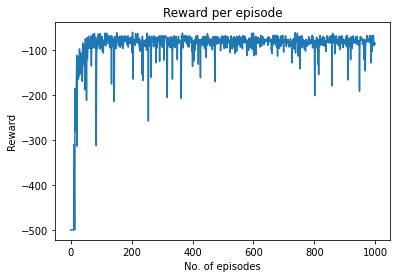

In [277]:
plt.plot(np.arange(len(episode_rewards)), episode_rewards)
plt.title("Reward per episode")
plt.xlabel("No. of episodes")
plt.ylabel("Reward")
plt.show()

In [278]:
eval_episode_rewards = []
num_episodes = 10
t1 = time.time()
try:
    for i in range(num_episodes):
        total_reward = 0
        obs = env3.reset()

        while True:
            probs=actor(to_tensor(obs, device))
            dist = torch.distributions.Categorical(probs=probs)
            action = dist.sample()
#             np_action = action.detach().data.numpy()
#             np_action = action.to(device).detach().data.numpy()
            np_action = action.cpu().detach().data.numpy()

            new_obs, reward, done, _ = env3.step(np_action)
            advt = reward + (1-done)*gama*critic(to_tensor(new_obs, device)) - critic(to_tensor(obs, device))
            total_reward += reward
            obs = new_obs

            if done:
                break

        print(f"Num episodes: {i+1}, Reward: {total_reward}")
        eval_episode_rewards.append(total_reward)
except KeyboardInterrupt:
    #to terminate program when taking too much training time.
    t2 = time.time()
t2 = time.time()
print(f"Total training time: {(t2-t1)/60} minutes")

Num episodes: 1, Reward: -83.0
Num episodes: 2, Reward: -88.0
Num episodes: 3, Reward: -77.0
Num episodes: 4, Reward: -85.0
Num episodes: 5, Reward: -85.0
Num episodes: 6, Reward: -251.0
Num episodes: 7, Reward: -91.0
Num episodes: 8, Reward: -77.0
Num episodes: 9, Reward: -77.0
Num episodes: 10, Reward: -91.0
Total training time: 0.007880047957102457 minutes


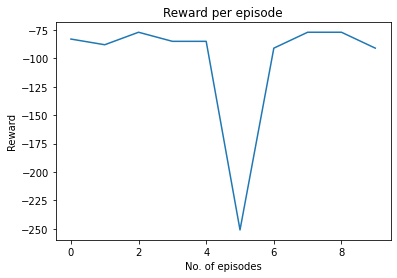

In [279]:
plt.plot(np.arange(len(eval_episode_rewards)), eval_episode_rewards)
plt.title("Reward per episode")
plt.xlabel("No. of episodes")
plt.ylabel("Reward")
plt.show()

In [ ]:
"""
Reference:
1. OpenAI gym Github: https://github.com/openai/gym/*
2. OpenAI gym website: https://gym.openai.com/
3. Class Notes and Lecture slides
4. https://towardsdatascience.com/understanding-actor-critic-methods-931b97b6df3f
5. https://github.com/parvkpr/Simple-A2C-Pytorch-MountainCarv0/blob/master/doodle.py
6. 
"""